***Sentiment Analysis on Codemixed English-Telugu Text***

  1.Normalizing Data--->Using Regular Expressions

  2.Applied Deep Learning Techniques(RNN, LSTM, BI-LSTM, GRU, CONV1D)

  3.Applied Pre-Trained Models(BERT, Roberta)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Normalizing Data***

In [38]:
#SymSpell is a Python library designed to perform efficient spelling correction and fuzzy string matching.
!pip install symspellpy
import pkg_resources
from symspellpy import SymSpell, Verbosity
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl size=190884 sha256=e7b5ac7a787ee9907d1efeab61c1bc713d7799de6c43ab047e29f45745e30357
  Stored in directory: /root/.cache/pip/wheels/88/6a/a6/a1283cc145323a1fb3d475bd158ee60b248ab1985230d266fc
Successfully built editdistpy


In [39]:
def elongation_normalization(text):
    text = text.lower()
    text = re.sub(r'(.)\1{2,}', r"\1\1", text)
    return text
example = "hellooo bagundhiii, gooood"
elongation_normalization(example)

'helloo bagundhii, good'

In [40]:
#SymSpell is a Python library designed to perform efficient spelling correction and fuzzy string matching.
sym_spell = SymSpell(max_dictionary_edit_distance=4)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def eng_spelling_correction(text):
    result = sym_spell.word_segmentation(text)
    return result.corrected_string

example = "thsi isa a lovely movei"
eng_spelling_correction(example)

'this is a lovely movie'

In [41]:
def transliteration_normalization(text):
    text = re.sub(r'(.)\1{1,}', r"\1", text)
    return text

example = "tinnaavaa sarigga"
transliteration_normalization(example)

'tinava sariga'

In [42]:
def consonant_normalization(text):
    text = text.replace('kh', 'k')
    text = text.replace('chh', 'ch')
    text = text.replace('gh', 'g')
    text = text.replace('th', 't')
    text = text.replace('jh', 'j')
    text = text.replace('dh', 'd')
    text = text.replace('bh', 'b')
    return text
example = "thinnava jharkand"
consonant_normalization(example)

'tinnava jarkand'

In [43]:
def data_normalization(text_tuple):
    text = ""
    for tupl in text_tuple:
        word = tupl[0]
        lang = tupl[1]

        word = elongation_normalization(word) # for both languages

        if lang == 'en': #english words
            word = eng_spelling_correction(word)
            text += word + " "

        if lang == 'te': # telugu words
            word = transliteration_normalization(word)
            word = consonant_normalization(word)
            text += word + " "

        if lang == 'univ': # universal
            text += word + " "
    return text

example = [('worstttt', 'en'), ('government', 'en'), ('.', 'univ'), ('#YSRCP', 'univ'), ('chala', 'te'), ('chethha', 'te'), ('ga', 'te'), ('paripalana', 'te'), ('chesthumdhi', 'te'), ('.', 'univ')]
data_normalization(example)

'worst government . #ysrcp chala cheta ga paripalana chestumdi . '

In [44]:
# Reading the text data
with open('/content/drive/MyDrive/NLP-IIIT/codemix_sentiment_data (1).txt') as f:
    df = f.readlines()

In [45]:
labels = []
sents = []
for i in range(0, len(df), 4):
    line1 = df[i]
    line2 = df[i+1]

    text = line1.replace('\n','')
    lang = line2.replace('\n','')

    label, sent = text[:3], text[4:]

    labels.append(label)
    out = [(word, lang) for word, lang in zip(sent.split(), lang.split())]
    sents.append(out)

In [46]:
print(sents[0], labels[0])
print(sents[1], labels[1])

[('We', 'en'), ('need', 'en'), ('Mr', 'univ'), ('chari', 'univ'), ("'s", 'univ'), ('review', 'en'), ('on', 'en'), ('master', 'en')] NTL
[('worst', 'en'), ('government', 'en'), ('.', 'univ'), ('#YSRCP', 'univ'), ('chala', 'te'), ('chethha', 'te'), ('ga', 'te'), ('paripalana', 'te'), ('chesthumdhi', 'te'), ('.', 'univ')] NEG


In [11]:
# Creating Normalised csv file
import csv

with open('normalized_data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['comment', 'label'])

    for i, tupl_text in enumerate(sents):
        if i%2500 == 0:
            print(i)
        text = data_normalization(tupl_text)
        label = labels[i]
        writer.writerow([text, label])

0
2500
5000
7500
10000
12500
15000
17500


In [47]:
import pandas as pd
normalized_data = pd.read_csv('/content/drive/MyDrive/NLP-IIIT/normalized_data (1).csv')
normalized_data.head(10)

,comment,label
0,we need mr chari 's review on master,NTL
1,worst government . #ysrcp chala cheta ga parip...,NEG
2,baya nuvu emina chepu kani bagoledu ani chepak...,NEG
3,gadini vadilesi manchi pani chesaru @rcbtweets 👍,POS
4,i came to watch thyview 's review crying after...,POS
5,enti baya review ela ichav chala anukuna gurin...,NTL
6,@mechanicmastr ne basha cheptundi ra ne batuku...,NEG
7,great bro single day 3 movies chusi reviews ch...,NTL
8,@puremass ante apudu online lo yavaru leru kab...,POS
9,what works and what does ’ to in mesam ! .,NTL


# ***Deep Learning Techniques***

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(tf.__version__)
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(0)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn import metrics

2.13.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
vocab_size = 5000
embedding_dim = 300
max_len = 25

batch_size=128
epochs=30

tokenizer = Tokenizer(num_words=vocab_size, oov_token="", lower=True)
binarizer = LabelBinarizer()

In [50]:
def simple_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(512, return_sequences=True))
    model.add(SimpleRNN(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def gru():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(GRU(512, return_sequences=True))
    model.add(GRU(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(LSTM(512, return_sequences=True))
    model.add(LSTM(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model
def bi_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def conv1d():
    model=Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

In [51]:
# Plot history:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['loss'], label='training data')
    plt.plot(history.history['val_loss'], label='validation data')
    plt.title('LOSS')
    plt.ylabel('Loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")

    # Plot history: Acc
    plt.figure()
    plt.plot(history.history['accuracy'], label='training data')
    plt.plot(history.history['val_accuracy'], label='validation data')
    plt.title('ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()


def evaluate_model(trained_model, y_test_true):
    y_test_preds = trained_model.predict(x_test)
    y_test_preds = np.argmax(y_test_preds, axis=1)

    print(metrics.classification_report(y_test_true, y_test_preds))

    cm = metrics.confusion_matrix(y_test_true, y_test_preds, normalize='true')
    sns.heatmap(cm, annot=True, cbar=None, cmap='viridis')
    plt.show()
    f1 = metrics.f1_score(y_test_true, y_test_preds, average='macro')
    return f1

In [53]:
data = pd.read_csv('/content/drive/MyDrive/NLP-IIIT/normalized_data (1).csv')
data.label = data.label.map({'NEG':0, 'POS':2,'NTL':1})
data.head()

,comment,label
0,we need mr chari 's review on master,1
1,worst government . #ysrcp chala cheta ga parip...,0
2,baya nuvu emina chepu kani bagoledu ani chepak...,0
3,gadini vadilesi manchi pani chesaru @rcbtweets 👍,2
4,i came to watch thyview 's review crying after...,2


In [54]:
# stop words
stop_words = set(stopwords.words('english'))
#print(stop_words)
# removing words like no,not,didn`t..etc from stop words
black_list = set(word for word in stop_words if 'no' in word or "'t" in word)
#print(black_list)
stop_words = stop_words - black_list
#print(stop_words)
data.comment = data.comment.apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

In [55]:
labels = data.label.tolist()
sentences = data.comment.tolist()
_= tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)
x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, stratify=labels, test_size=0.2, random_state=101)

y_train_true = y_train.copy()
y_test_true = y_test.copy()

y_train = binarizer.fit_transform(y_train)
y_test = binarizer.fit_transform(y_test)


Epoch 1/30
125/125 [==============================] - 42s 295ms/step - loss: 0.8639 - accuracy: 0.5886 - val_loss: 0.7189 - val_accuracy: 0.6887
Epoch 2/30
  1/125 [..............................] - ETA: 7s - loss: 0.7985 - accuracy: 0.6797

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 22s 180ms/step - loss: 0.5789 - accuracy: 0.7607 - val_loss: 0.6076 - val_accuracy: 0.7431
Epoch 3/30
125/125 [==============================] - 16s 132ms/step - loss: 0.4540 - accuracy: 0.8205 - val_loss: 0.6151 - val_accuracy: 0.7592
Epoch 4/30
125/125 [==============================] - 20s 159ms/step - loss: 0.3659 - accuracy: 0.8565 - val_loss: 0.6415 - val_accuracy: 0.7496
Epoch 5/30
125/125 [==============================] - 11s 89ms/step - loss: 0.2982 - accuracy: 0.8886 - val_loss: 0.7534 - val_accuracy: 0.7421


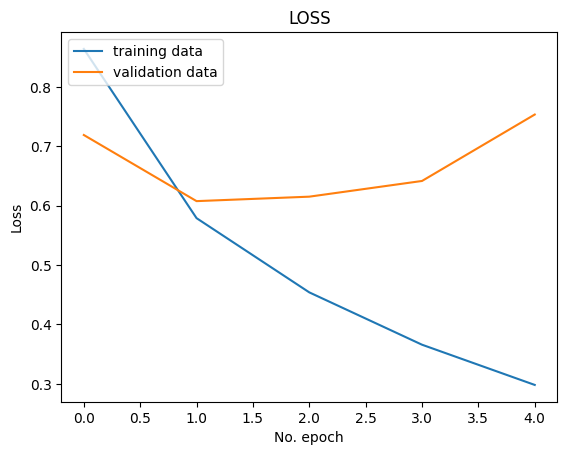

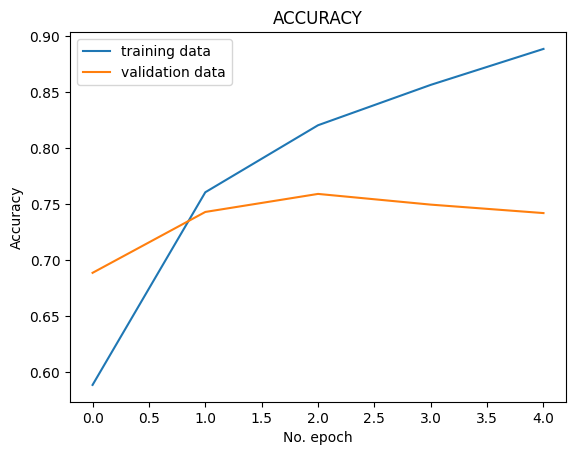

125/125 [==============================] - 2s 13ms/step
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1544
           1       0.62      0.56      0.59       844
           2       0.77      0.74      0.76      1586

    accuracy                           0.74      3974
   macro avg       0.72      0.71      0.72      3974
weighted avg       0.74      0.74      0.74      3974



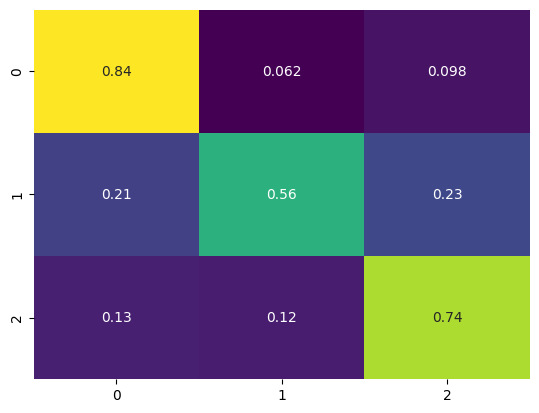

f1 score 0.7161793239978195


In [56]:
# RNN
rnn_model = simple_rnn()
checkpoint_path="simple_rnn_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = rnn_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(rnn_model, y_test_true)
print("f1 score", f1)

Epoch 1/30
125/125 [==============================] - 30s 193ms/step - loss: 0.9814 - accuracy: 0.4935 - val_loss: 0.8680 - val_accuracy: 0.5745
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 10s 83ms/step - loss: 0.7651 - accuracy: 0.6506 - val_loss: 0.7179 - val_accuracy: 0.6777
Epoch 3/30
125/125 [==============================] - 6s 47ms/step - loss: 0.6538 - accuracy: 0.7149 - val_loss: 0.7028 - val_accuracy: 0.6711
Epoch 4/30
125/125 [==============================] - 7s 55ms/step - loss: 0.5654 - accuracy: 0.7522 - val_loss: 0.6085 - val_accuracy: 0.7250
Epoch 5/30
125/125 [==============================] - 4s 33ms/step - loss: 0.4545 - accuracy: 0.8043 - val_loss: 0.5880 - val_accuracy: 0.7428
Epoch 6/30
125/125 [==============================] - 6s 47ms/step - loss: 0.3876 - accuracy: 0.8406 - val_loss: 0.5816 - val_accuracy: 0.7614
Epoch 7/30
125/125 [==============================] - 6s 47ms/step - loss: 0.3579 - accuracy: 0.8594 - val_loss: 0.6181 - val_accuracy: 0.7526
Epoch 8/30
125/125 [==============================] - 5s 39ms/step - loss: 0.3330 - accuracy: 0.8701 - val_loss: 0.6340 - val_accuracy: 0.7547
Epoch 9/3

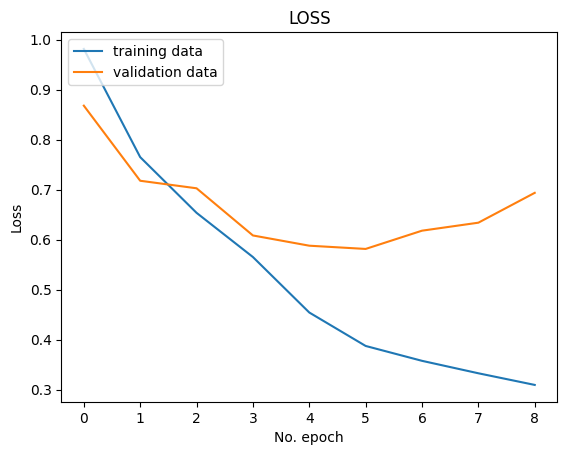

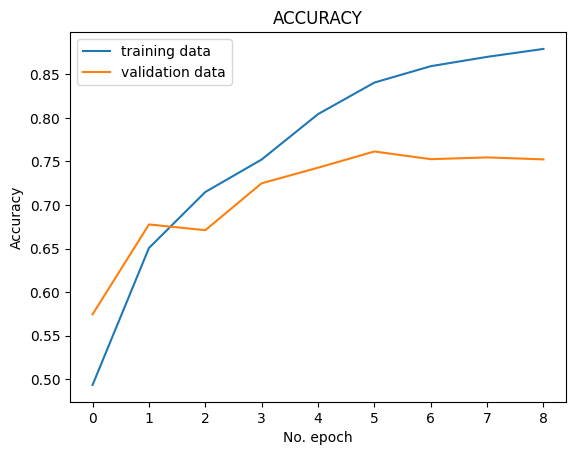

125/125 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1544
           1       0.60      0.64      0.62       844
           2       0.77      0.77      0.77      1586

    accuracy                           0.75      3974
   macro avg       0.73      0.73      0.73      3974
weighted avg       0.75      0.75      0.75      3974



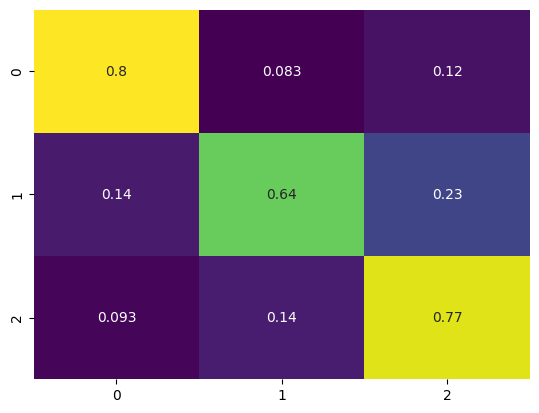

f1 score 0.7331022371727279


In [57]:
# GRU
gru_model = gru()
checkpoint_path="gru_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = gru_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(gru_model, y_test_true)
print("f1 score", f1)

Epoch 1/30
125/125 [==============================] - 27s 184ms/step - loss: 0.9384 - accuracy: 0.5267 - val_loss: 0.8070 - val_accuracy: 0.6125
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 11s 90ms/step - loss: 0.6615 - accuracy: 0.7083 - val_loss: 0.5859 - val_accuracy: 0.7446
Epoch 3/30
125/125 [==============================] - 6s 46ms/step - loss: 0.4827 - accuracy: 0.7985 - val_loss: 0.5603 - val_accuracy: 0.7577
Epoch 4/30
125/125 [==============================] - 7s 57ms/step - loss: 0.4168 - accuracy: 0.8311 - val_loss: 0.5692 - val_accuracy: 0.7592
Epoch 5/30
125/125 [==============================] - 5s 38ms/step - loss: 0.3811 - accuracy: 0.8462 - val_loss: 0.6574 - val_accuracy: 0.7479
Epoch 6/30
125/125 [==============================] - 4s 34ms/step - loss: 0.3469 - accuracy: 0.8629 - val_loss: 0.6547 - val_accuracy: 0.7521
Epoch 7/30
125/125 [==============================] - 4s 33ms/step - loss: 0.3256 - accuracy: 0.8727 - val_loss: 0.6634 - val_accuracy: 0.7406
Epoch 8/30
125/125 [==============================] - 5s 43ms/step - loss: 0.3065 - accuracy: 0.8826 - val_loss: 0.7280 - val_accuracy: 0.7436


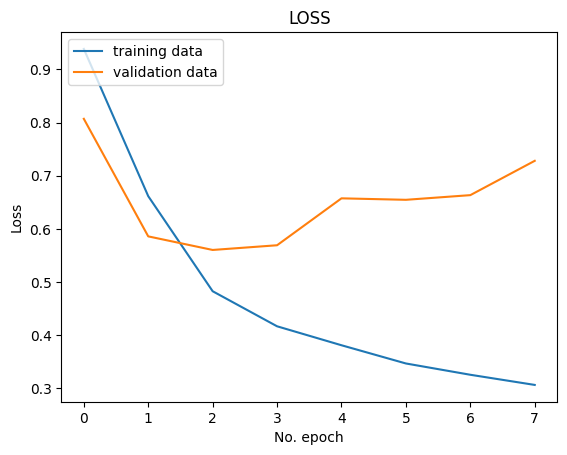

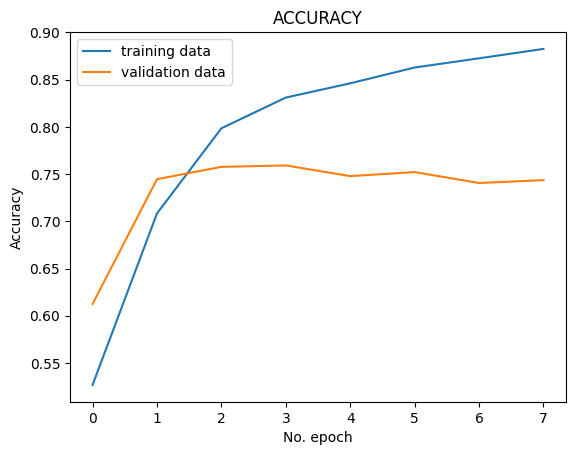

125/125 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1544
           1       0.57      0.70      0.63       844
           2       0.78      0.73      0.75      1586

    accuracy                           0.74      3974
   macro avg       0.73      0.74      0.73      3974
weighted avg       0.76      0.74      0.75      3974



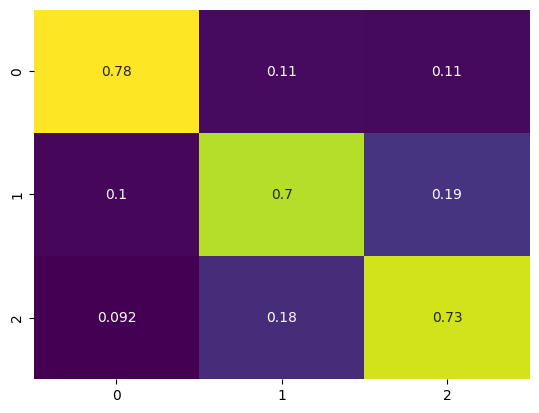

f1 score 0.7292405816193411


In [58]:
# LSTM
lstm_model = lstm()
checkpoint_path="lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(lstm_model, y_test_true)
print("f1 score", f1)

Epoch 1/30
125/125 [==============================] - ETA: 0s - loss: 0.9226 - accuracy: 0.5402

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 37s 224ms/step - loss: 0.9226 - accuracy: 0.5402 - val_loss: 0.7892 - val_accuracy: 0.6366
Epoch 2/30
125/125 [==============================] - 13s 107ms/step - loss: 0.5935 - accuracy: 0.7450 - val_loss: 0.5505 - val_accuracy: 0.7589
Epoch 3/30
125/125 [==============================] - 9s 73ms/step - loss: 0.4495 - accuracy: 0.8154 - val_loss: 0.5425 - val_accuracy: 0.7758
Epoch 4/30
125/125 [==============================] - 9s 76ms/step - loss: 0.3912 - accuracy: 0.8412 - val_loss: 0.5611 - val_accuracy: 0.7682
Epoch 5/30
125/125 [==============================] - 8s 61ms/step - loss: 0.3638 - accuracy: 0.8552 - val_loss: 0.6187 - val_accuracy: 0.7650
Epoch 6/30
125/125 [==============================] - 8s 63ms/step - loss: 0.3241 - accuracy: 0.8733 - val_loss: 0.6344 - val_accuracy: 0.7632


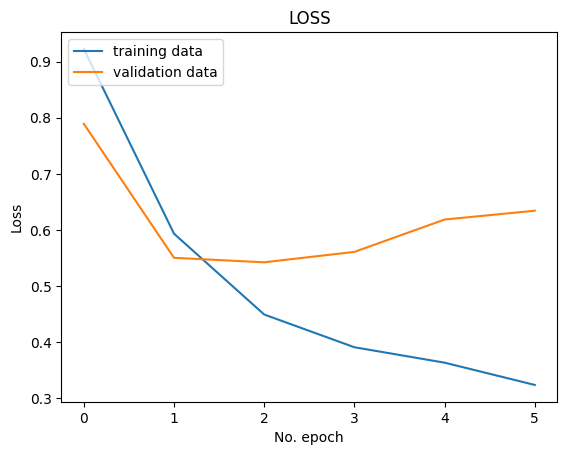

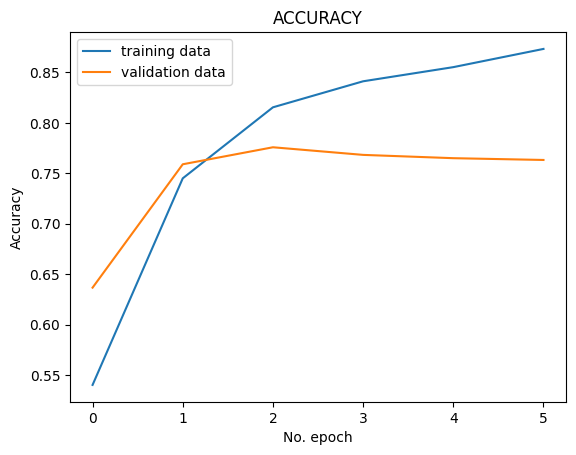

125/125 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1544
           1       0.58      0.72      0.64       844
           2       0.82      0.75      0.78      1586

    accuracy                           0.76      3974
   macro avg       0.75      0.76      0.75      3974
weighted avg       0.78      0.76      0.77      3974



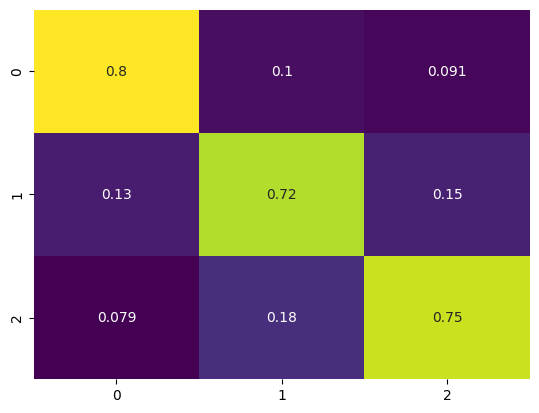

f1 score 0.748241444235625


In [59]:
# BI LSTM

bi_lstm_model = bi_lstm()
checkpoint_path="bi_lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = bi_lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(bi_lstm_model, y_test_true)
print("f1 score", f1)

Epoch 1/30
125/125 [==============================] - 30s 179ms/step - loss: 0.9970 - accuracy: 0.4787 - val_loss: 0.9327 - val_accuracy: 0.5405
Epoch 2/30
  1/125 [..............................] - ETA: 1s - loss: 1.0152 - accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 7s 58ms/step - loss: 0.8496 - accuracy: 0.5919 - val_loss: 0.7476 - val_accuracy: 0.6626
Epoch 3/30
125/125 [==============================] - 5s 38ms/step - loss: 0.6186 - accuracy: 0.7362 - val_loss: 0.5834 - val_accuracy: 0.7411
Epoch 4/30
125/125 [==============================] - 6s 47ms/step - loss: 0.4632 - accuracy: 0.8080 - val_loss: 0.5433 - val_accuracy: 0.7589
Epoch 5/30
125/125 [==============================] - 3s 25ms/step - loss: 0.3907 - accuracy: 0.8433 - val_loss: 0.5453 - val_accuracy: 0.7708
Epoch 6/30
125/125 [==============================] - 3s 21ms/step - loss: 0.3397 - accuracy: 0.8705 - val_loss: 0.5634 - val_accuracy: 0.7710
Epoch 7/30
125/125 [==============================] - 2s 19ms/step - loss: 0.3013 - accuracy: 0.8871 - val_loss: 0.5972 - val_accuracy: 0.7710


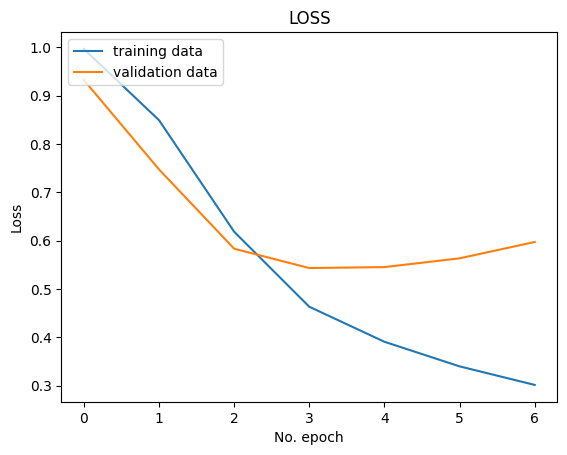

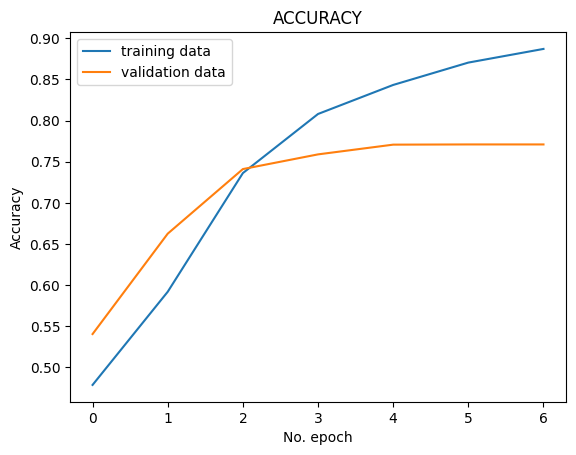

125/125 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1544
           1       0.63      0.65      0.64       844
           2       0.78      0.80      0.79      1586

    accuracy                           0.77      3974
   macro avg       0.75      0.75      0.75      3974
weighted avg       0.77      0.77      0.77      3974



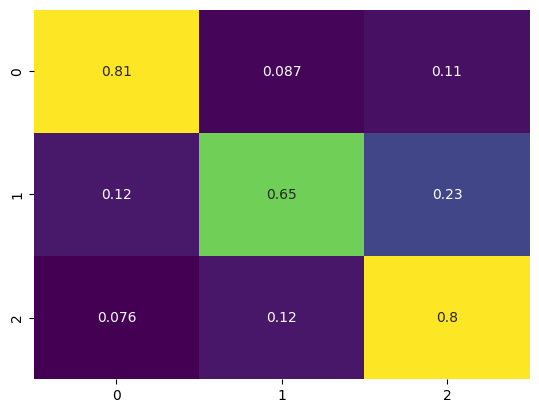

f1 score 0.7511521539577334


In [60]:
conv_model = conv1d()
checkpoint_path="conv_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = conv_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(conv_model, y_test_true)
print("f1 score", f1)

In [ ]:
''' RESULTS:            Accuaracy      F1-Scores
     1.Simple RNN --->   74%              71.71%
     2.GRU        --->   75%              73.07%
     3.LSTM       --->   74%              73.16%
     4.BI-LSTM    --->   76%              74.51%
     5.CONV1D     --->   77%              74.65% '''



# ***Pre-Trained Models***

In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/NLP-IIIT/normalized_data (1).csv')

In [3]:
!pip install keras

In [4]:
! pip install tensorflow

In [5]:
#https://github.com/ThilinaRajapakse/simpletransformers/blob/master/README.md#with-conda
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import string
from tqdm import tqdm_notebook as tqdm

from gensim.models import *

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import *
from keras.models import *
import keras.backend as K
from tensorflow.keras.utils import to_categorical

from keras.callbacks import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import regularizers
from numpy import array
from numpy import asarray
from numpy import zeros

In [6]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [7]:
!pip install --upgrade simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 22.5 MB/s eta 0:00:00
  

In [8]:
!pip install --upgrade transformers

In [9]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)


In [10]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [11]:
y=data['label'].tolist()
X_train, X_test, y_train, y_test = train_test_split(data['comment'].tolist(), y, random_state=5, test_size=0.2) #train, test split
#validation split
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight="balanced",
                                                 classes=np.unique(y_train),
                                              y=y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=5, test_size=0.1)

In [12]:
list_of_class={'NEG':0,'NTL':1,'POS':2}
y_val=[list_of_class[i.strip()]for i in y_val]
y_train=[list_of_class[i.strip()]for i in y_train]
y_test=[list_of_class[i.strip()]for i in y_test]

In [13]:
# class weights
class_weights

array([0.85714286, 1.57070857, 0.83564669])

In [14]:
d1 = {'comment': X_train, 'label': y_train}
df_train = pd.DataFrame(d1)

In [15]:
d2 = {'comment': X_val, 'label': y_val}
df_val = pd.DataFrame(d2)

In [16]:
d3 = {'comment': X_test, 'label': y_test}
df_test = pd.DataFrame(d3)

In [17]:
df_train.shape,df_val.shape,df_test.shape

((14304, 2), (1590, 2), (3974, 2))

In [18]:
model = ClassificationModel('bert', 'bert-base-multilingual-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 3, 'weights': [0.85714286, 1.57070857, 0.83564669]})

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
model.train_model(df_train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/14304 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1788 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1788 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1788 [00:00<?, ?it/s]

(5364, 0.5128716601310249)

In [20]:
result, model_outputs, wrong_predictions = model.eval_model(df_val)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1590 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/199 [00:00<?, ?it/s]

In [21]:
comments = df_test['comment'].tolist()
predictions, raw_outputs = model.predict(comments)

  0%|          | 0/3974 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

In [22]:
list_of_class={0:'NEG',1:'NTL',2:'POS'}
print(classification_report([list_of_class[i] for i in y_test],
                            [list_of_class[i] for i in predictions]))

              precision    recall  f1-score   support

         NEG       0.84      0.85      0.84      1536
         NTL       0.63      0.67      0.65       849
         POS       0.85      0.81      0.83      1589

    accuracy                           0.80      3974
   macro avg       0.77      0.78      0.78      3974
weighted avg       0.80      0.80      0.80      3974



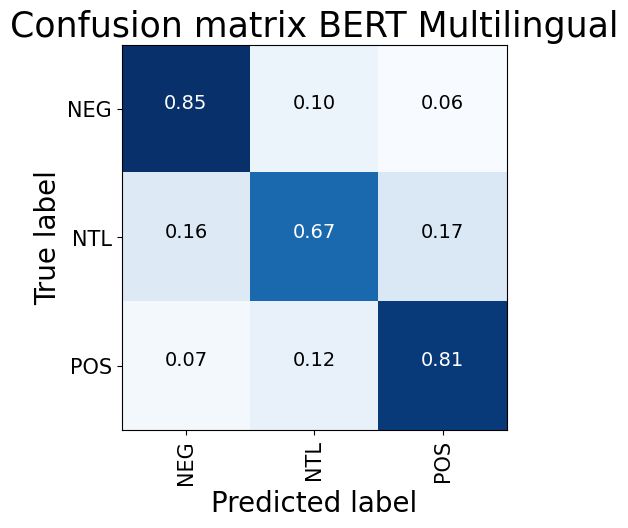

In [23]:
cnf_matrix = confusion_matrix([list_of_class[i] for i in y_test],
                              [list_of_class[i] for i in predictions])

plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=list(list_of_class.values()), title="Confusion matrix BERT Multilingual")
plt.show()

In [24]:
# making predictions on new data
predictions = model.predict(["nvu anthaga bagooooledhu","nvu chala bagunnav","vadu enti chetthat ga unnadu"])
print(predictions)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(array([0, 2, 0]), array([[ 0.85888672, -0.50195312, -0.47607422],
       [-2.1640625 , -2.19726562,  4.5078125 ],
       [ 3.3046875 , -1.8125    , -1.84667969]]))


In [30]:
# Roberta model
model_roberta= ClassificationModel("roberta", "roberta-base",  num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True,'num_train_epochs':5,'weights':[0.85714286, 1.57070857, 0.83564669]})

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
model_roberta.train_model(df_train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/14304 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1788 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1788 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1788 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1788 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1788 [00:00<?, ?it/s]

(8940, 0.46090775051839666)

In [32]:
result, model_outputs, wrong_predictions = model_roberta.eval_model(df_val)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1590 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/199 [00:00<?, ?it/s]

In [33]:
comments = df_test['comment'].tolist()
predictions_rb, raw_outputs = model_roberta.predict(comments)

  0%|          | 0/3974 [00:00<?, ?it/s]

  0%|          | 0/497 [00:00<?, ?it/s]

In [34]:
print(classification_report([list_of_class[i] for i in y_test],
                            [list_of_class[i] for i in predictions_rb]))

              precision    recall  f1-score   support

         NEG       0.85      0.85      0.85      1536
         NTL       0.63      0.69      0.66       849
         POS       0.86      0.81      0.84      1589

    accuracy                           0.80      3974
   macro avg       0.78      0.79      0.78      3974
weighted avg       0.81      0.80      0.80      3974



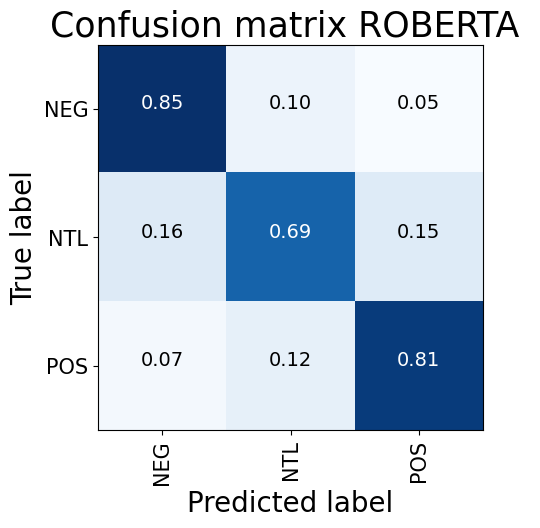

In [35]:
cnf_matrix = confusion_matrix([list_of_class[i] for i in y_test],
                              [list_of_class[i] for i in predictions_rb])

plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=list(list_of_class.values()), title="Confusion matrix ROBERTA ")
plt.show()

In [36]:
# predictions on new data
predictions_rb= model_roberta.predict(["nvu anthaga bagoledhu","nvu chala bagunnav","vadu enti chettat ga unnadu"])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
predictions_rb

(array([0, 2, 0]),
 array([[ 1.73242188, -0.64306641, -0.53320312],
        [-2.97070312, -2.53320312,  5.24609375],
        [ 5.3125    , -1.50390625, -2.51757812]]))

In [ ]:
 '''RESULTS:            Accuaracy      F1-Scores
     1.BERT    --->        80%            77%
     2.ROBERTA --->        80%            78% '''